<a href="https://colab.research.google.com/github/mangeshemekar/Deep-Learning/blob/main/Insurance/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("new_insurance_data.csv")

In [5]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


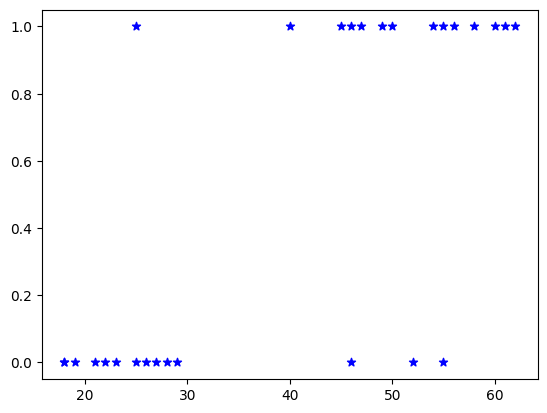

In [6]:
plt.scatter(df.age,df.bought_insurance, marker='*', color='blue')

In [7]:
df.shape

(28, 3)

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance, test_size=0.8)

In [10]:
x_test

,age
1,25
24,50
18,19
14,49
3,52
21,26
25,54
4,46
15,55
9,61


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
model.predict(x_test)

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1])

In [14]:
model.predict_proba(x_test)

array([[9.97591278e-01, 2.40872207e-03],
       [6.25453840e-03, 9.93745462e-01],
       [9.99831585e-01, 1.68415438e-04],
       [9.71427641e-03, 9.90285724e-01],
       [2.58426266e-03, 9.97415737e-01],
       [9.96250852e-01, 3.74914803e-03],
       [1.06546159e-03, 9.98934538e-01],
       [3.58098205e-02, 9.64190180e-01],
       [6.83870441e-04, 9.99316130e-01],
       [4.77387672e-05, 9.99952261e-01],
       [9.97591278e-01, 2.40872207e-03],
       [9.99007014e-01, 9.92985528e-04],
       [9.99891937e-01, 1.08063313e-04],
       [5.47180532e-02, 9.45281947e-01],
       [9.99590987e-01, 4.09012937e-04],
       [3.58098205e-02, 9.64190180e-01],
       [7.44028296e-05, 9.99925597e-01],
       [3.47418636e-01, 6.52581364e-01],
       [9.94168855e-01, 5.83114539e-03],
       [9.99891937e-01, 1.08063313e-04],
       [6.83870441e-04, 9.99316130e-01],
       [1.80718637e-04, 9.99819281e-01],
       [3.06301269e-05, 9.99969370e-01]])

In [15]:
model.score(x_test,y_test)

0.8260869565217391

In [16]:
model.coef_

array([[0.44377684]])

In [17]:
import tensorflow as tf
import numpy as np
from tensorflow import keras


In [18]:
x_train_scaled = x_train.copy()
x_train_scaled['age'] = x_train_scaled['age']/100

x_test_scaled = x_test.copy()
x_test_scaled['age'] = x_test_scaled['age']/100

In [19]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)


(5, 1)
(23, 1)


In [20]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,),activation='sigmoid', kernel_initializer='ones',bias_initializer='zeros')
])

model.compile(optimizer="sgd", loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train, epochs = 10, verbose=1, validation_data = (x_test_scaled, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step - accuracy: 0.4000 - loss: 0.6876 - val_accuracy: 0.5217 - val_loss: 0.6566
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4000 - loss: 0.6873 - val_accuracy: 0.5217 - val_loss: 0.6565
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.4000 - loss: 0.6869 - val_accuracy: 0.5217 - val_loss: 0.6564
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4000 - loss: 0.6865 - val_accuracy: 0.5217 - val_loss: 0.6562
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.4000 - loss: 0.6862 - val_accuracy: 0.5217 - val_loss: 0.6561
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.4000 - loss: 0.6858 - val_accuracy: 0.5217 - val_loss: 0.6559
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.4000 - loss: 0.6855 - val_accuracy: 0.5217 - val_loss: 0.6558
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.4000 - loss: 0.6851 - val_accuracy: 0.5217 - val_loss: 0.6557
Epoch 9

In [21]:
# L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(x_train, y_train)
print("L1 Regularized Accuracy:", model_l1.score(x_train_scaled, y_train))
print("L1 Coefficients:", model_l1.coef_)

# L2 Regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model_l2.fit(x_train, y_train)
print("L2 Regularized Accuracy:", model_l2.score(x_train_scaled, y_train))
print("L2 Coefficients:", model_l2.coef_)

L1 Regularized Accuracy: 0.4
L1 Coefficients: [[0.00594065]]
L2 Regularized Accuracy: 0.6
L2 Coefficients: [[0.0236391]]


We can see there is not much change in accuracy even after L1 and L2 regularization as the model is too simple and the dataset is very small